# Frequência de postagens no facebook

Caso o pacote não esteja instalado, use o comando abaixo (retirando o '#')

In [36]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

Vamos precisar importar as seguintes bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
%matplotlib inline

Leitura dos dados baixados no site do facebook. Os dados podem ser baixados aqui: https://www.facebook.com/dyi/?referrer=yfi_settings

In [4]:
# leia o arquivo json
df = pd.read_json('C:\\Users\\euler\\OneDrive\\Documents\\Projetos\\projetos_py\\How to Facebook\\facebook-euleralencar\\posts\\your_posts_1.json')

df.head(3)

,timestamp,data,title,attachments,tags
0,2020-05-21 04:11:52,[{'post': 'TÃ´ um tempo sem entrar no Face. Al...,Euler Alencar atualizou o status dele.,NaN,NaN
1,2020-05-15 19:27:48,[{'post': 'A pandemia tÃ¡ matando mais ministr...,Euler Alencar atualizou o status dele.,NaN,NaN
2,2020-04-06 04:39:00,"[{'post': 'Repita comigo: ""Pensar diferente (s...",Euler Alencar atualizou o status dele.,NaN,NaN


In [5]:
# renomeia a coluna timestamp
df.rename(columns={'timestamp': 'date'}, inplace=True)

In [6]:
df.head()

,date,data,title,attachments,tags
0,2020-05-21 04:11:52,[{'post': 'TÃ´ um tempo sem entrar no Face. Al...,Euler Alencar atualizou o status dele.,NaN,NaN
1,2020-05-15 19:27:48,[{'post': 'A pandemia tÃ¡ matando mais ministr...,Euler Alencar atualizou o status dele.,NaN,NaN
2,2020-04-06 04:39:00,"[{'post': 'Repita comigo: ""Pensar diferente (s...",Euler Alencar atualizou o status dele.,NaN,NaN
3,2020-01-29 05:23:28,[{'update_timestamp': 1580275408}],NaN,[],NaN
4,2019-10-07 15:48:23,[{'post': 'https://www.youtube.com/watch?v=IvT...,NaN,[{'data': [{'external_context': {'url': 'https...,NaN


In [7]:
# drop as colunas desnecessárias
df = df.drop(['attachments', 'title', 'tags'], axis=1)

In [8]:
# vamos trnsformar 'date' em formato tempo para ter certeza
pd.to_datetime(df['date'])

df.head(3)

,date,data
0,2020-05-21 04:11:52,[{'post': 'TÃ´ um tempo sem entrar no Face. Al...
1,2020-05-15 19:27:48,[{'post': 'A pandemia tÃ¡ matando mais ministr...
2,2020-04-06 04:39:00,"[{'post': 'Repita comigo: ""Pensar diferente (s..."


In [9]:
# Dimensão da tabela
print(df.shape)

(4014, 2)


In [74]:
index = df.index
number_of_rows = len(index)

Quantidade de post desde de 2011

In [75]:
number_of_rows

4014

Supondo que cada post tenha demorado entre 10 e 30 minutos, vamos calcular o intervalo de tempo gasto.

In [78]:
(number_of_rows*10/60)/24,(number_of_rows*30/60)/24

(27.875, 83.625)

Ou seja, se considerar somente o tempo de produção de um post, foram gastos de 1 mês a 3 meses de 2011 até 2020. 

In [10]:
df.tail(3)

,date,data
4011,2011-04-29 11:36:54,[{'post': 'http://www.youtube.com/watch?v=brFi...
4012,2011-04-29 04:05:25,[{'post': 'http://www.youtube.com/watch?v=_pqK...
4013,2011-04-24 14:56:55,[{'post': 'http://oermodolampiao.wordpress.com...


O pandas foi projetado para facilitar o trabalho com dados de séries temporais. Precisamos fazer duas coisas aqui:

1. Defina a coluna de data como o índice de nosso DataFrame.
2. Agrupe os dados por mês, contando quantas postagens ocorrem em cada mês.

Para a primeira etapa, podemos usar set_index (). A segunda será usando o comando resample().

In [11]:
df = df.set_index('date')

In [12]:
df.head()

,data
date,
2020-05-21 04:11:52,[{'post': 'TÃ´ um tempo sem entrar no Face. Al...
2020-05-15 19:27:48,[{'post': 'A pandemia tÃ¡ matando mais ministr...
2020-04-06 04:39:00,"[{'post': 'Repita comigo: ""Pensar diferente (s..."
2020-01-29 05:23:28,[{'update_timestamp': 1580275408}]
2019-10-07 15:48:23,[{'post': 'https://www.youtube.com/watch?v=IvT...


## Quantidade de posts por mês

In [13]:
post_counts = df['data'].resample('MS').size()
post_counts

date
2011-04-01    11
2011-05-01    83
2011-06-01    60
2011-07-01    84
2011-08-01    48
              ..
2020-01-01     1
2020-02-01     0
2020-03-01     0
2020-04-01     1
2020-05-01     2
Freq: MS, Name: data, Length: 110, dtype: int64

C:\Users\euler\Python\envs\base (root)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


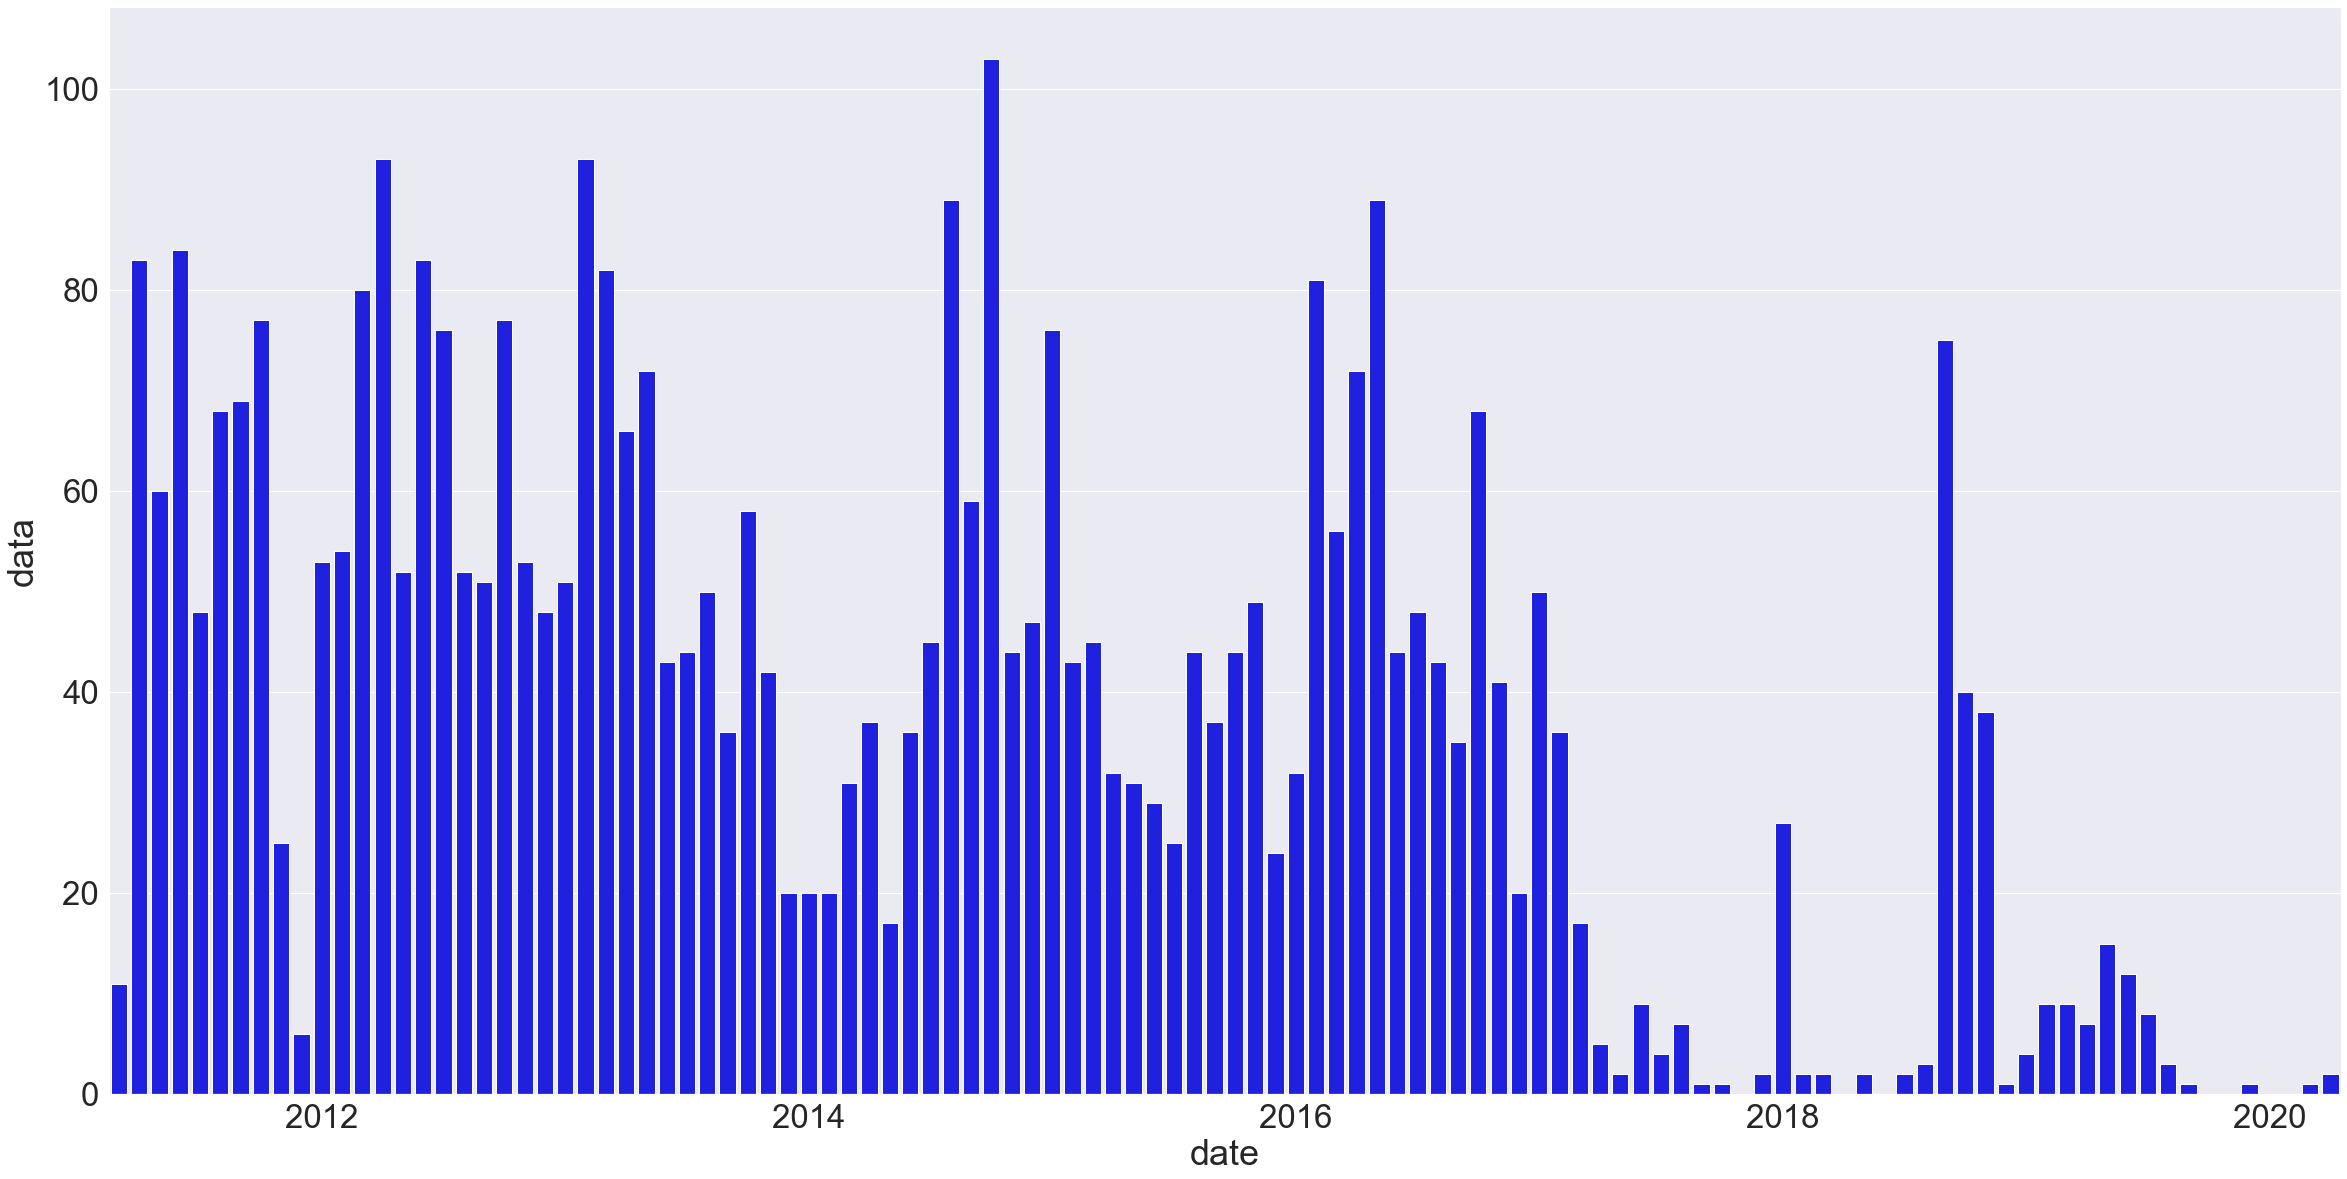

In [14]:
# configirar o tamanho e a fonte
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)

# configure o label de x
x_labels = post_counts.index

# crie um gráfico de barra
sns.barplot(x_labels, post_counts, color="blue")

# somente mostre o label de x-axis começando em Jan 1 e mostrando cada ano
tick_positions = np.arange(10, len(x_labels), step=24)

#reformatando a data para mostrar reformar somente o ano onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

# mostrar o plot
plt.show()

## Quantidade de postagens por trimestre

In [15]:
post_counts = df['data'].resample('Q').size()
post_counts

date
2011-06-30    154
2011-09-30    200
2011-12-31    171
2012-03-31    113
2012-06-30    225
2012-09-30    211
2012-12-31    181
2013-03-31    192
2013-06-30    220
2013-09-30    137
2013-12-31    136
2014-03-31     60
2014-06-30     85
2014-09-30    170
2014-12-31    206
2015-03-31    166
2015-06-30    108
2015-09-30     98
2015-12-31    130
2016-03-31    137
2016-06-30    217
2016-09-30    135
2016-12-31    144
2017-03-31    106
2017-06-30     24
2017-09-30     20
2017-12-31      2
2018-03-31     31
2018-06-30      4
2018-09-30      5
2018-12-31    153
2019-03-31     14
2019-06-30     31
2019-09-30     23
2019-12-31      1
2020-03-31      1
2020-06-30      3
Freq: Q-DEC, Name: data, dtype: int64

In [46]:
positionx = np.arange(0, len(post_counts), step=1)

C:\Users\euler\Python\envs\base (root)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


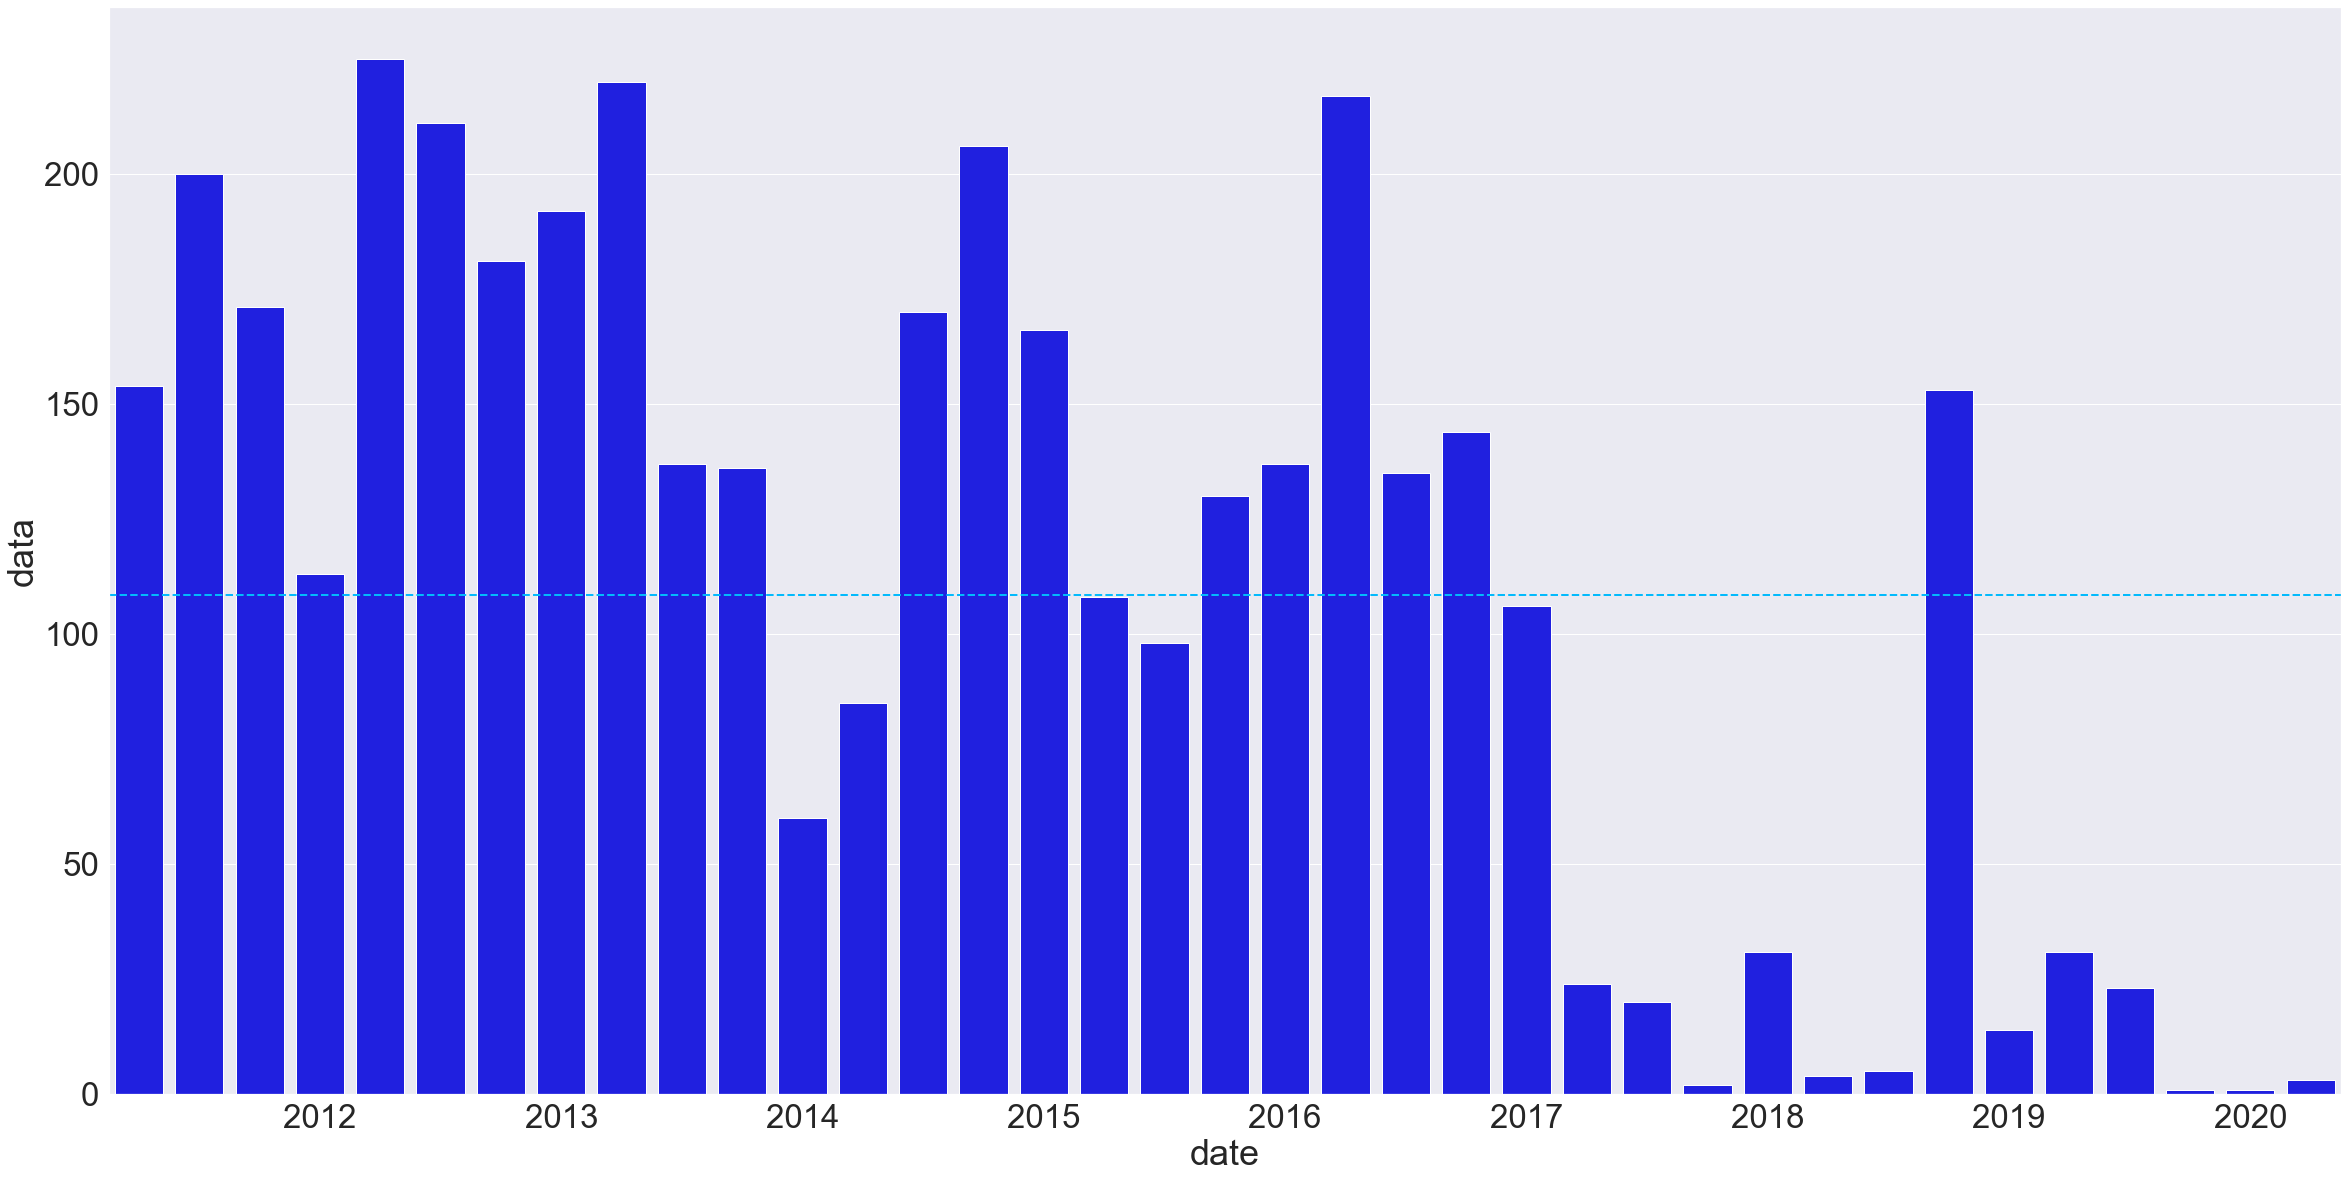

In [80]:
# configirar o tamanho e a fonte
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)

# configure o label de x
x_labels = post_counts.index

# crie um gráfico de barra
sns.barplot(x_labels, post_counts, color="blue")

# somente mostre o label de x-axis começando em Jan 1 e mostrando cada ano
tick_positions = np.arange(3, len(x_labels), step=4)

#reformatando a data para mostrar reformar somente o ano onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

#incluir linha com a média para comparação
plt.axhline(y=post_counts.mean(), linewidth=2, linestyle='--', color='#03bafc')
    
# mostrar o plot
plt.show()

In [17]:
#Fonte: https://stackoverflow.com/questions/28129606/how-to-create-a-matplotlib-bar-chart-with-a-threshold-line

A partir dos dados acima é possível criar um modelo de série temporal para verificar o momento de quebra da série.